In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

In [2]:
def plot_centerline_trace(filename, start=0, end=8000):

    # Read the simulation results
    calcium = pd.read_hdf("./results/data/calcium/" + filename + ".h5")
    calcium = calcium.values.reshape(len(calcium), 60, 60)

    # Separate ectoderm and endoderm
    calcium_ecto = calcium[:, :30, :]
    calcium_endo = calcium[:, 30:, :]

    ca_center = calcium_ecto[:, 15, :]

    plt.figure(figsize=(20,3))
    plt.plot(np.arange(int(start*0.02), int(end*0.02), 0.02), ca_center[start:end], linewidth=0.5)
    plt.ylim(0, 2)
    plt.show()

## V0. 
-- _Original version_

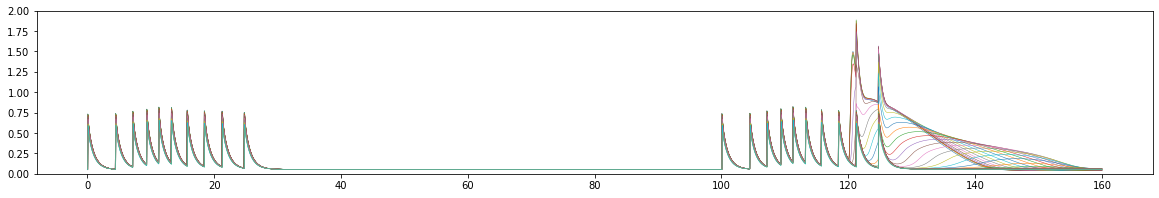

In [3]:
# s0 = 100, k_ipr = 0.2, k_deg = 0.15 (original version, separate pathways)
plot_centerline_trace("2020-09-04-20-58-46-156006")

## V1. 
-- _Based on the V0, cancel the self-invented IP3 thresholding on PLC-delta_
- Calcium released from ER during contraction bursts
- Dim calcium diffusion when stimulating the slow pathway
- Weak bending  (tested on COMSOL)

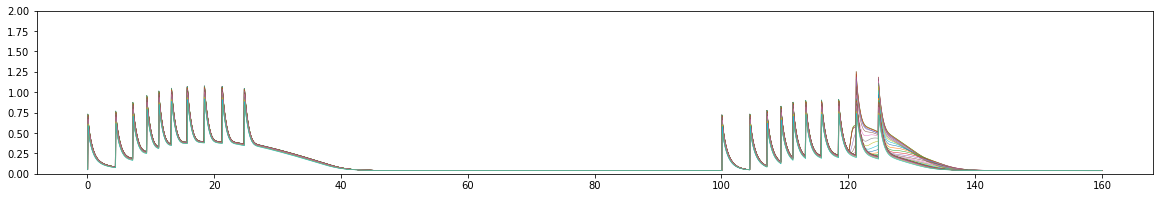

In [4]:
# s0 = 100, k_ipr = 0.2, k_deg = 0.15 (coupled pathways, other settings same with the original version)
plot_centerline_trace("2020-09-21-23-59-45-573184")

## V2. 

-- _Based on V1, reduce the decay rate of IP3 (to make it last longer)_

- More calcium release from ER during contraction bursts
- Dimmer calcium diffusion when stimulating the slow pathway

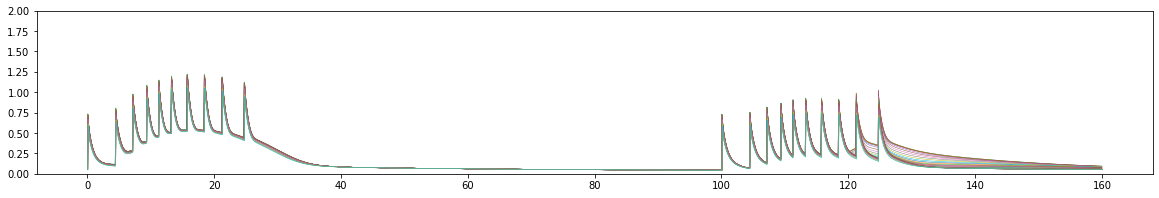

In [5]:
# s0 = 100, k_ipr = 0.2, k_deg = 0.025 (make the IP3 decay rate slower)
plot_centerline_trace("2020-09-22-16-17-44-543420")

## V3. 

-- _Based on V1, enhance the direct stimulation of slow pathway_

- Calcium release from ER during contraction bursts
- No big difference on downstream cells
- Weak bending (tested on COMSOL)

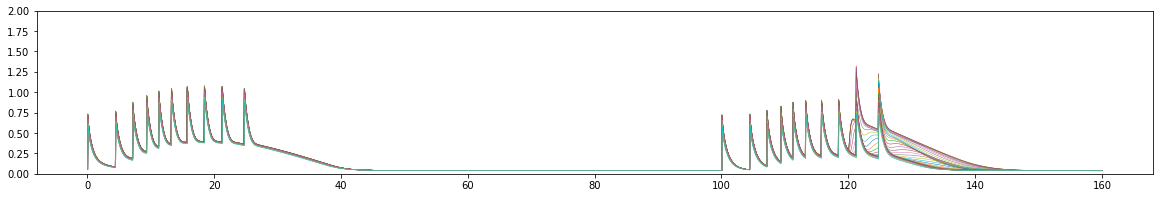

In [6]:
# s0 = 100, k_ipr = 0.2, k_deg = 0.15, active_v_beta = 5 (stronger stimulation on slow pathway)
plot_centerline_trace("2020-09-23-10-44-15-335082")

## V4. 

-- _Based on V1, increase the capacity of ER to 6x larger_

- Majority of calcium released from ER during contraction bursts
- Dim calcium duffusion when stimulating the slow pathway

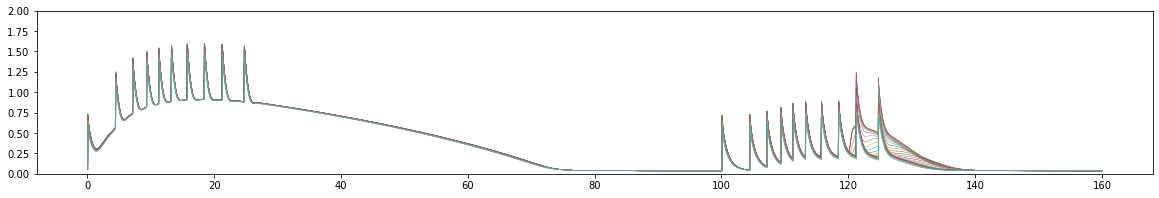

In [7]:
# s0 = 600, k_ipr = 0.02, k_deg = 0.15 (larger store)
plot_centerline_trace("2020-09-21-23-59-21-961697")  

## V5.

-- Based on V4, reduce the IP3-sensitivity of IPR

- Calcium slowly released from ER during contraction bursts; the releasing process lasts for a long time even after CB
- Strong calcium diffusion when stimulating the slow pathway (but still no wave)
- Bending is stronger than V1 but weaker than V0, and becoming much weaker in the second turn

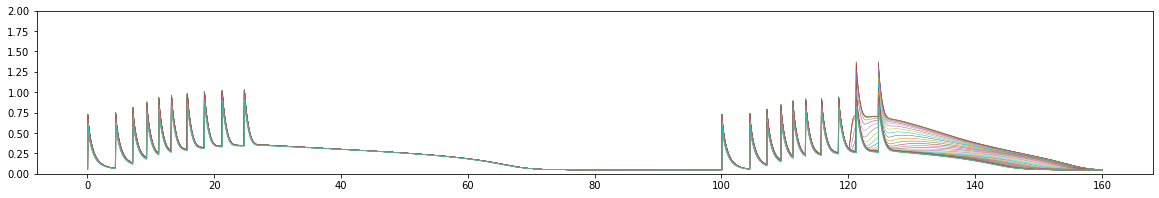

In [8]:
# s0 = 600, k_ipr = 0.02, k_deg = 0.15 (larger store, but with a smaller IPR sensitivity)
plot_centerline_trace("2020-09-21-23-59-31-978715")

## V6.

-- Based on V0, cancel the whole PLC-delta

- No calcium released from ER during contraction bursts (since the pathways are separated)
- Strong calcium diffusion (no wave)

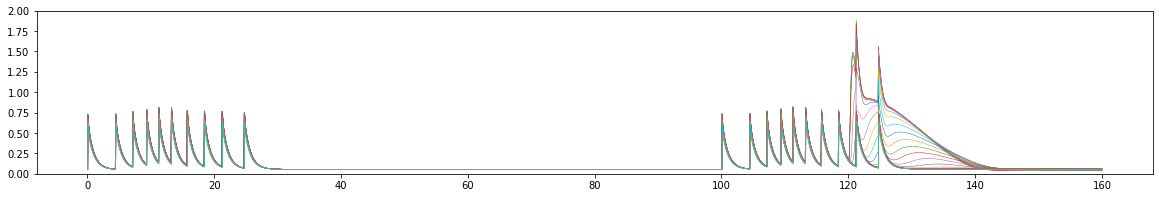

In [9]:
# s0 = 100, k_ipr = 0.2, k_deg = 0.15, v_delta = 0 (no PLC-delta)
plot_centerline_trace("2020-09-23-14-56-34-720830")

## V7.

-- Based on V6, increase the coefficient of gap junctional IP3 diffusion

- Similar result with V6, but the calcium diffuses to more downstream cells

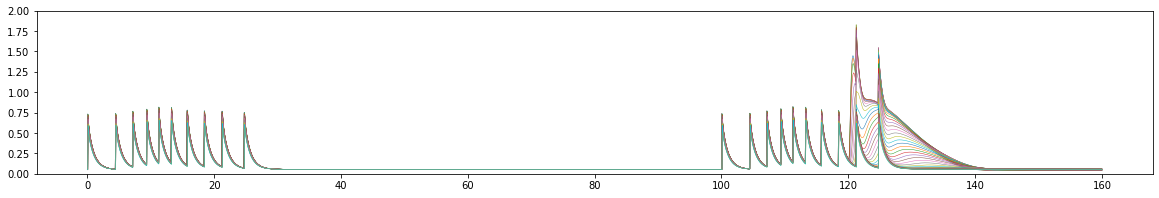

In [10]:
# s0 = 100, k_ipr = 0.2, k_deg = 0.15, v_delta = 0, gip3y = 10 (no PLC-delta, larger IP3 diffusion coefficient)
plot_centerline_trace("2020-09-23-16-11-23-888760")

## V8.

-- Based on V6, decrease the decay rate of IP3

- Diffusive calcium wave -- looks similar to V0

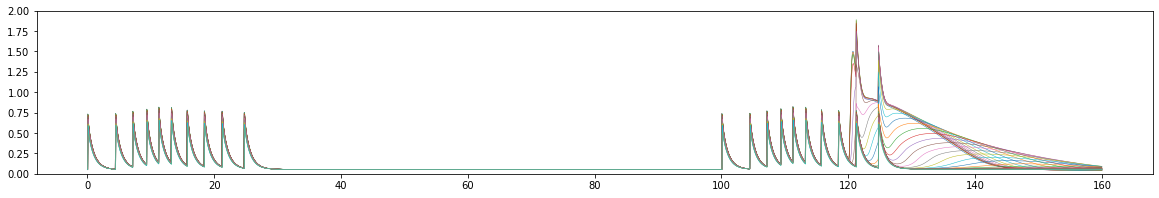

In [21]:
# s0 = 100, k_ipr = 0.2, k_deg = 0.05, v_delta = 0 (no PLC-delta, slower IP3 decay rate)
plot_centerline_trace("2020-09-23-16-11-16-728521")

## V9.

-- Based on V8, further decrease the decay rate of IP3

- Stronger diffusive calcium wave

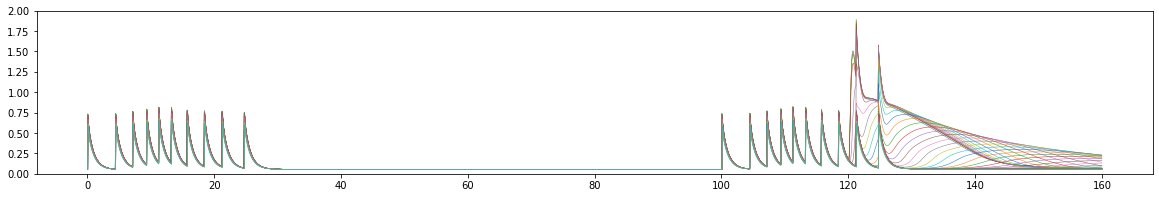

In [12]:
# s0 = 100, k_ipr = 0.2, k_deg = 0.02, v_delta = 0 (no PLC-delta, much slower IP3 decay rate)
plot_centerline_trace("2020-09-23-16-55-24-885607")

## V10.

-- Based on V9, further decrease the decay rate of IP3

- Stronger diffusive calcium wave

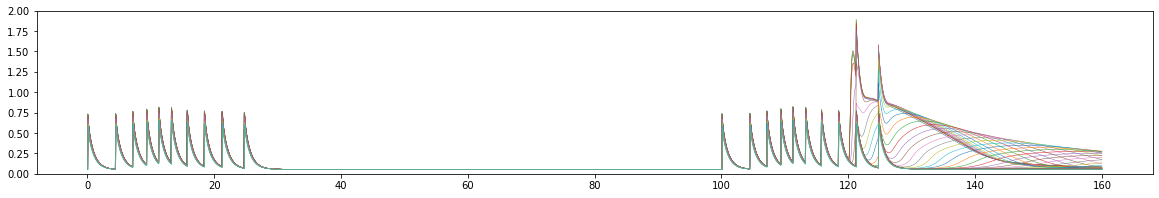

In [13]:
# s0 = 100, k_ipr = 0.2, k_deg = 0.01, v_delta = 0 (no PLC-delta, much slower IP3 decay rate)
plot_centerline_trace("2020-09-23-16-55-27-009080")

# Conclusion

- Really hard to get a strong slow dynamics when two pathways are coupled (ER is hard to initiate another calcium elevation just after being exploited by contraction bursts)
- It seems without PLC-delta we can still get a diffusive wave under the current parameter settings, by making IP3 decay much slower. 

In [3]:
# plot_centerline_trace("2020-09-23-21-39-21-001853", start=0, end=5000)

In [4]:
# plot_centerline_trace("2020-09-24-11-35-47-991222", start=0, end=5000)

In [5]:
# def plot_centerline_curve_200x200(filename, start=0, end=25000):

#     # Read the simulation results

#     calcium = pd.read_hdf("./results/data/calcium/" + filename + ".h5")
#     calcium = calcium.values.reshape(len(calcium), 400, 200)

#     # Separate ectoderm and endoderm
#     calcium_ecto = calcium[:, :200, :]
#     calcium_endo = calcium[:, 200:, :]

#     ca_center = calcium_ecto[:, 100, :]

#     plt.figure(figsize=(20,3))
#     plt.plot(np.arange(int(start*0.02), int(end*0.02), 0.02), ca_center[start:end], linewidth=0.5)
#     plt.ylim(0, 2)
#     plt.show()
    
#     return calcium_ecto

In [5]:
# calcium_ecto = plot_centerline_curve_200x200("2020-09-24-00-21-20-730124", start=0, end=2500)